# Computer Vision Thresholding

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

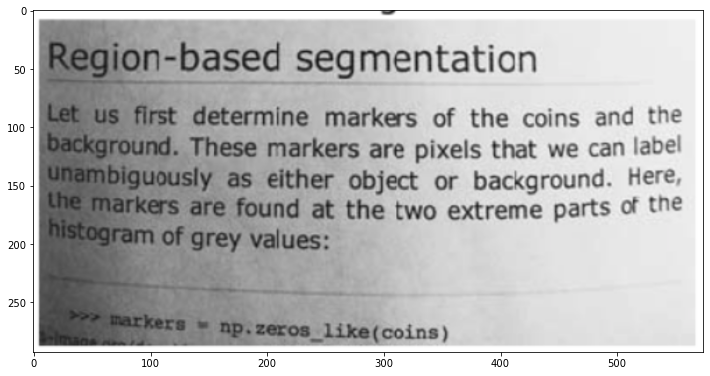

In [3]:
# Have a look at the 2 images below
text = cv2.imread('img/t1.png')
plt.figure(figsize = (12,10))
plt.imshow(text, cmap='gray')


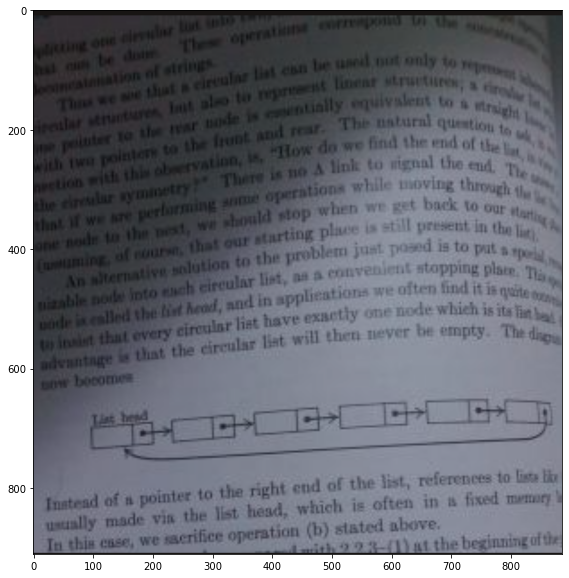

In [4]:
text_2 = cv2.imread('img/t2.png')
plt.figure(figsize = (12,10))
plt.imshow(text_2, cmap='gray')


In [155]:
text_g = cv2.cvtColor(text, cv2.COLOR_BGR2GRAY)
text2_g = cv2.cvtColor(text_2, cv2.COLOR_BGR2GRAY)

In [7]:
# Apply threshold to the images above to make them look better, try to find the best one
titles = ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
types = [cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV]

comp = CVThreshComp(text2_g, titles, types)

#comp.preview()
comp.tracker()

KeyboardInterrupt: 

In [80]:
sharp_kernel = np.array([[0.0625,0.125,0.0625], 
          [0.125,0.25,0.125],
          [0.0625,0.125,0.0625]])

In [174]:
text2_g.shape

(911, 886)

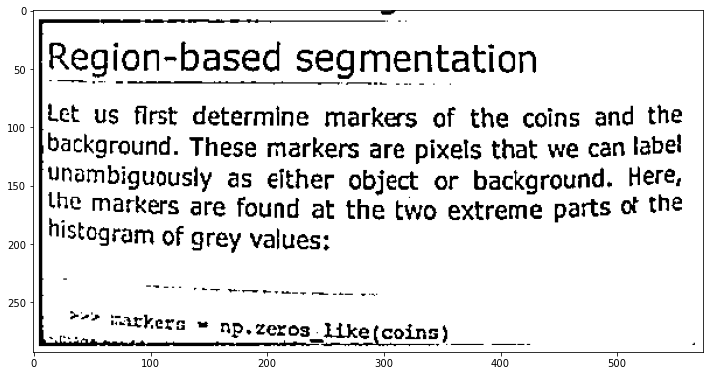

In [117]:
# Try to apply adaptiveThreshold and see if that helps, use both ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C
thresh = cv2.adaptiveThreshold(text_g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 11)
thresh2 = cv2.adaptiveThreshold(text2_g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 0)
plt.figure(figsize = (12,10))
plt.imshow(thresh, cmap='gray')

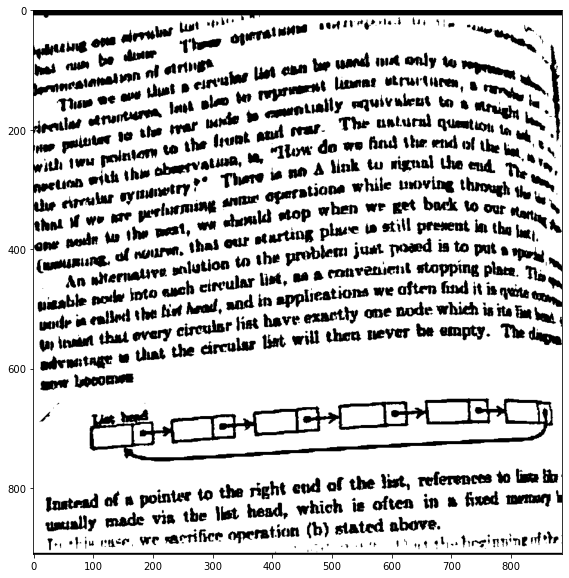

In [552]:
# Now try to first apply Gaussian Blur to the image and then Otsu thresholding
mask = cv2.fillPoly(text2_g.copy(), [np.array([[911,911], [911, 0], [700, 0], [0, 700], [0, 1000]])], [50,50,30])
scaled = cv2.addWeighted(mask, 0.5, text2_g, 1, 0)
scaled = cv2.adaptiveThreshold(scaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 111,8)
sharp_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

#scaled = cv2.morphologyEx(scaled, cv2.MORPH_CLOSE, np.ones([3,3], np.uint8), 100)

#scaled = cv2.adaptiveThreshold(scaled, 25, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 1)
for i in range(10):
   scaled = cv2.filter2D(scaled, -1, sharp_kernel)

plt.figure(figsize = (12,10))
plt.imshow(scaled, cmap='gray')

In [ ]:
# In yesterday's notebook there was a similar challenge, with a image of a note which was very dark on the left side
# If you didn't manage to get it clean yesterday, try to go back to it now and apply what you just did here.
# Did it get better?


In [8]:
class CVThreshComp():
    def __init__(self, image, titles, types):
        self.org = image
        self.img = image.copy()
        self.titles = titles
        self.types = types
        self.val = 0
        self.typ = (types[0], titles[0])
        
    def preview(self):
        cv2.namedWindow('preview', cv2.WINDOW_AUTOSIZE)
        cv2.moveWindow('preview', 0, 0)
        key = 0
        idx = 0
        while key != ord('q'):
            org = cv2.putText(self.org.copy(), f"ORIGINAL", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                           2, [255,255,255], 6, cv2.LINE_AA) 
            org = cv2.putText(org, f"ORIGINAL", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                           2, [0,0,255], 2, cv2.LINE_AA) 

            cv2.imshow('preview', org)
            key = cv2.waitKey(1000)
            while key != ord('q'):
                key = cv2.waitKey(10)
                info = [str(self.val), self.typ[1]]
                self.val += 1
                if self.val == 255:
                    break
                _, thresh_img = cv2.threshold(self.img, self.val, 255, self.typ[0])
                thresh_img = cv2.putText(thresh_img, f"{info[0]} : {info[1]}", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                                           2, [255,255,255], 6, cv2.LINE_AA) 
                thresh_img = cv2.putText(thresh_img, f"{info[0]} : {info[1]}", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                                           2, [0,0,255], 2, cv2.LINE_AA)
                cv2.imshow('preview', thresh_img)

            self.val = 0
            if idx == 4:
                break
            idx += 1
            self.typ = (self.types[idx], self.titles[idx])
        cv2.destroyAllWindows()
        cv2.waitKey(1)
            
    def tracker(self):
        cv2.namedWindow('preview', cv2.WINDOW_AUTOSIZE)
        cv2.moveWindow('preview', 0, 0)
        cv2.createTrackbar("Value", 'preview', 0, 255, self._track_action)
        cv2.createTrackbar("Type", 'preview', 0, len(self.types)-1, self._track_action_gate)
        cv2.imshow('preview', self.org)
        while True:
            key = cv2.waitKey()
            if key == ord('q'):
                cv2.destroyAllWindows()
                cv2.waitKey(1)
                break
        

    def _track_action(self, val):
        self.val = val
        info = [str(self.val), self.typ[1]]
        _, thresh_img = cv2.threshold(self.img, self.val, 255, self.typ[0])
        thresh_img = cv2.putText(thresh_img, f"{info[0]} : {info[1]}", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   2, [255,255,255], 6, cv2.LINE_AA) 
        thresh_img = cv2.putText(thresh_img, f"{info[0]} : {info[1]}", (100,100), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   2, [0,0,255], 2, cv2.LINE_AA)
        cv2.imshow('preview', thresh_img)

    def _track_action_gate(self, val):
        self.typ = (self.types[val], self.titles[val])
        self._track_action(self.val)